In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
eps = 1
sig = 1
def lj(r, eps=eps, sig=sig):
    return 4*eps*((sig/r)**12-(sig/r)**6)

rs = np.linspace(0.1,5,500)

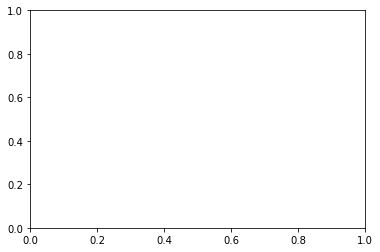

In [3]:
fig, ax = plt.subplots()

In [4]:

ax.plot(rs, lj(rs), color="b")

ax.text(sig/2,lj(sig)+0.1, r"$\sigma$", color="r")
ax.plot((0,sig),(0,lj(sig)), marker="|", markersize=15, mew=2, color ="r")

minsig = 2**(1/6)*sig
ax.text(minsig/2,lj(minsig)+0.1, r"$2^{1/6}\sigma$", color="orange")
ax.plot((0,minsig),(-eps,lj(minsig)), marker="|", markersize=15, mew=2, color ="orange")

ax.text(minsig+0.1,-eps/2, r"$\epsilon$", color="green")
ax.plot((minsig,minsig),(0,-eps), marker="_", markersize=15, mew=2, color ="green")

ax.set_xlabel("Distance, r")
ax.set_ylabel(r"Energy, $U_{LJ}$")
ax.set_ylim(-(eps+0.1),eps)
ax.set_xlim(-.1, 3*sig)
ax.set_xticks([])
ax.set_yticks([])
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)

fig.savefig('lj.pdf', bbox_inches='tight')

In [16]:
help(ax.axhline)

Help on method axhline in module matplotlib.axes._axes:

axhline(y=0, xmin=0, xmax=1, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Add a horizontal line across the axis.
    
    Parameters
    ----------
    y : scalar, optional, default: 0
        y position in data coordinates of the horizontal line.
    
    xmin : scalar, optional, default: 0
        Should be between 0 and 1, 0 being the far left of the plot, 1 the
        far right of the plot.
    
    xmax : scalar, optional, default: 1
        Should be between 0 and 1, 0 being the far left of the plot, 1 the
        far right of the plot.
    
    Returns
    -------
    line : `~matplotlib.lines.Line2D`
    
    Other Parameters
    ----------------
    **kwargs
        Valid keyword arguments are `.Line2D` properties, with the
        exception of 'transform':
    
        Properties:
        agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3